# Distance to ChrAcc peak summits
We think the only active in one context regions are flanking regions to the NFR. To test this, we will plot the distance from region center to nearest peak summit for all of the regions and then plot the distance as a density plot.

To do this, I need to extract and convert the region centers to a bedfile. I also need to convert the summits to a bedfile. Then I will use bedtools closest and have it write out the distance for me.

Peak summits are defined by the human data for each shared peak

## Extract region centers
Do this using this operation: ((End-Start)/2)+start

For even numbered lengths, you will get exactly the center. For odd number lengths, you will get a decimal that will need to be rounded to an integer. Round up using the round(digits=0) function in R.

In [20]:
suppressPackageStartupMessages(library(tidyverse))
ini <- ini::read.ini("../config.ini")

In [22]:
read_tsv(ini$`HH-VS-MM`$conserved_active, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/cons-active_centers.bed",
        col_names = FALSE)

In [2]:
read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis-only`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/hh_cis-only_centers.bed",
        col_names = FALSE)

In [3]:
read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_trans-only`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/hh_trans-only_centers.bed",
        col_names = FALSE)

In [4]:
read_tsv(ini$CIS_TRANS$`hh-active_mm-inactive_cis+trans`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/hh_cis+trans_centers.bed",
        col_names = FALSE)

In [5]:
read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis-only`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/mm_cis-only_centers.bed",
        col_names = FALSE)

In [6]:
read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_trans-only`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/mm_trans-only_centers.bed",
        col_names = FALSE)

In [7]:
read_tsv(ini$CIS_TRANS$`mm-active_hh-inactive_cis+trans`, 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/mm_cis+trans_centers.bed",
        col_names = FALSE)

In [6]:
#PhastCons 30-way elements
read_tsv("/data/hodges_lab/public_data/PhastCons/phastConsElements30way.6col.bed", 
         col_names=c("Chr","Start","End","name","score","strand"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/phastCons30_centers.bed",
        col_names = FALSE)

In [3]:
#H3K27ac peaks GM12878
read_tsv("/data/hodges_lab/public_data/GM12878/obtained_as_processed_files/processed-bed-files/GM12878_H3K27ac_ChIP.bed", 
         col_names=c("Chr","Start","End"), show_col_types = FALSE) %>% 
    mutate(center = round(((End-Start)/2)+Start), digits = 0) %>% 
    mutate(Start = center-1, End = center) %>%
    select(Chr,Start,End) %>%  
    arrange(Chr,Start,End) %>%
    write_tsv("/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/H3K27ac_centers.bed",
        col_names = FALSE)

##  Extract peak summits
To get the summits, I will intersect -u the HH acc peaks with the shared peaks. The Summits are 0-based offset from chromStart, so we will add the summit to the start and end will be start+1.

In [1]:
HH_PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/chrAcc_peaks/3_noXY-filtered_peaks/GM12878inGM12878_DNA_genrich.filtered_1.8.noXY.narrowPeak'
SHARED_PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/chrAcc_peaks/shared_peaks/shared_peaks_by-intersect.bed'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center'

#this reports only the peaks in HH that overlap shared peaks and converts from peak to summit coordinates. 
bedtools intersect -u -a $HH_PEAKS -b $SHARED_PEAKS | awk '{OFS=FS="\t"}{print $1,$10+$2,$10+$2+1}' - > \
    ${OUT_DIR}/shared_peaks_by-intersect.summits.bed

In [5]:
MM_PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/chrAcc_peaks/3_noXY-filtered_peaks/LCL8664inLCL8664_DNA_genrich.filtered_1.8.noXY.hg38-from-rheMac10.narrowPeak'
SHARED_PEAKS='/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/chrAcc_peaks/shared_peaks/shared_peaks_by-intersect.bed'
OUT_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center'

#this reports only the peaks in HH that overlap shared peaks and converts from peak to summit coordinates. 
bedtools intersect -u -a $MM_PEAKS -b $SHARED_PEAKS | awk '{OFS=FS="\t"}{print $1,$10+$2,$10+$2+1}' - | sort -k1,1 -k2,2n > \
    ${OUT_DIR}/shared_peaks_by-intersect_mm.summits.bed

## Get distances to peak summits

In [1]:
cd /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center

for i in cons-active hh_cis-only hh_trans-only hh_cis+trans phastCons30 H3K27ac
do
    sort -k1,1 -k2,2n ${i}_centers.bed | bedtools closest -D ref -a - \
                               -b shared_peaks_by-intersect.summits.bed > \
                               ${i}_region-centers.distances.hg38.bed
done

In [2]:
cd /data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center

for i in mm_cis-only mm_trans-only mm_cis+trans phastCons30 H3K27ac
do
    sort -k1,1 -k2,2n ${i}_centers.bed | bedtools closest -D ref -a - \
                               -b shared_peaks_by-intersect_mm.summits.bed > \
                               ${i}_mm_region-centers.distances.hg38.bed
done

## Plot distribution

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))

dir <- '/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/'

#read in results
for (i in list("cons-active", "hh_cis-only", "hh_trans-only", "hh_cis+trans", "mm_cis-only", "mm_trans-only", "mm_cis+trans")) {    
    tsv <- read_tsv(paste0(dir, i, "_region-centers.distances.hg38.bed"), 
             col_names=FALSE, show_col_types = FALSE) %>% mutate(code=i)
    assign(value = tsv, x = paste0("results_",i))
}

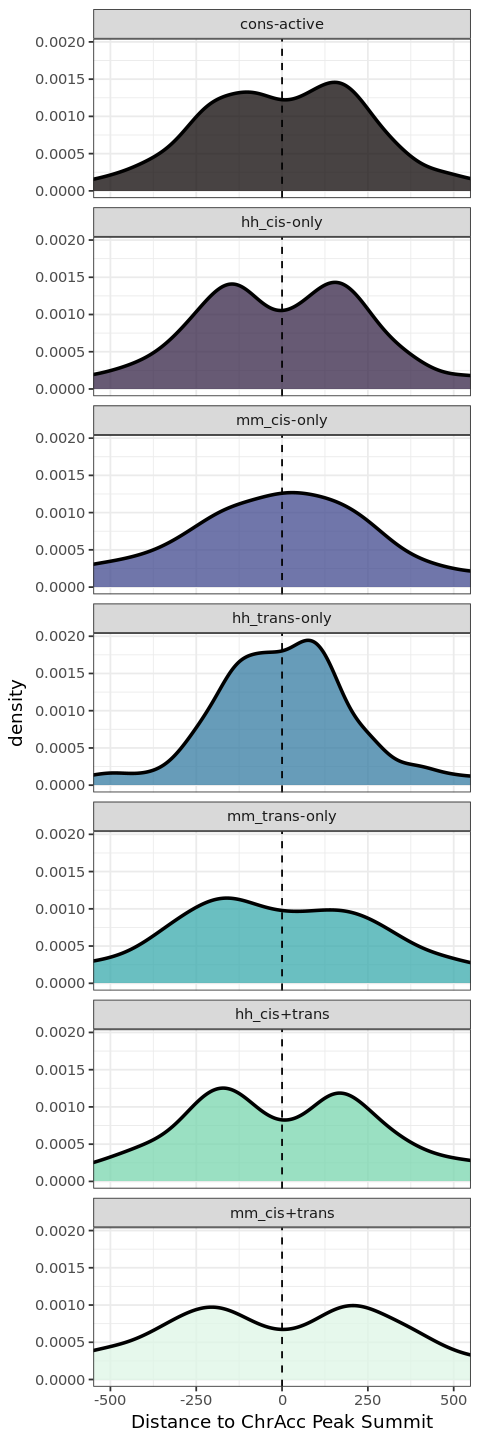

In [2]:
options(repr.plot.width = 4, repr.plot.height = 12)

res <- bind_rows(`results_cons-active`, `results_hh_cis-only`, `results_hh_trans-only`, `results_hh_cis+trans`, 
                    `results_mm_cis-only`, `results_mm_trans-only`, `results_mm_cis+trans`) %>% filter(abs(X7) < 1000)

res$code %<>% factor(levels = c("cons-active", "hh_cis-only", "mm_cis-only", "hh_trans-only", "mm_trans-only", "hh_cis+trans", "mm_cis+trans"))

p <- ggplot(res, aes(x=X7, fill = code)) + 
    geom_density(lwd=1, alpha=0.75) + 
    geom_vline(xintercept = c(0), linetype="dashed") +
    facet_wrap(~code, ncol = 1) +
    xlab(label = "Distance to ChrAcc Peak Summit") +
    theme_bw() +
    theme(legend.position = "none") +
    scale_fill_viridis_d(option = "mako") +
    coord_cartesian(xlim=c(-500,500))

p

In [3]:
ggsave(plot = p, filename = paste0(dir, "density_plot.pdf"), width = 6, height = 12, device = cairo_pdf)

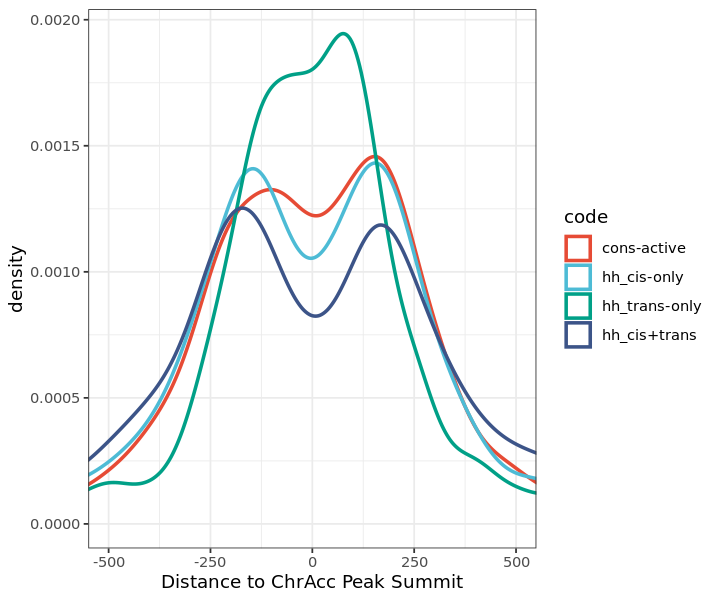

In [4]:
#only human for main

options(repr.plot.width = 6, repr.plot.height = 5)

res <- filter(res, code %in% c("hh_cis-only", "hh_trans-only", "hh_cis+trans", "cons-active"))

p <- ggplot(res, aes(x=X7, color = code)) + 
    geom_density(lwd=1) +
    xlab(label = "Distance to ChrAcc Peak Summit") +
    theme_bw() +
    theme() +
    ggsci::scale_color_npg() +
    coord_cartesian(xlim=c(-500,500))

p

In [6]:
ggsave(plot = p, filename = paste0(dir, "density_plot-hh-merge.pdf"), width = 6, height = 5, device = cairo_pdf)

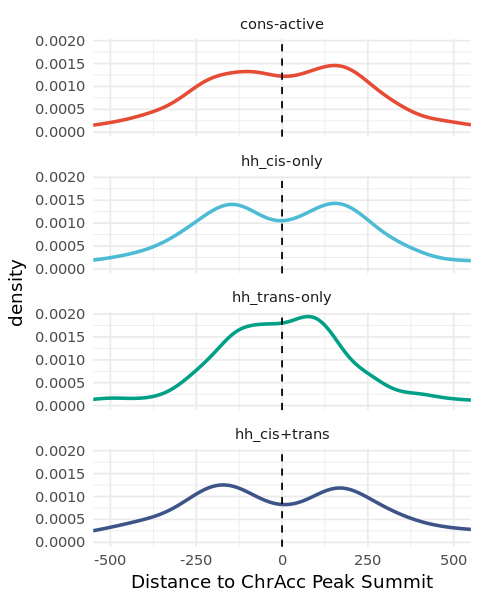

In [20]:
options(repr.plot.width = 4, repr.plot.height = 5)

p <- ggplot(res, aes(x=X7, color = code)) + 
    geom_density(lwd=1, alpha=0.75) + 
    geom_vline(xintercept = c(0), linetype="dashed") +
    facet_wrap(~code, ncol = 1) +
    xlab(label = "Distance to ChrAcc Peak Summit") +
    theme_minimal() +
    theme(legend.position = "none") +
    ggsci::scale_color_npg() +
    coord_cartesian(xlim=c(-500,500))

p

In [21]:
ggsave(plot = p, filename = paste0(dir, "density_plot-hh-seperate.pdf"), width = 4, height = 4, device = cairo_pdf)

In [2]:
# plot phyloP with deeptools
phyloP='/data/hodges_lab/public_data/PhastCons/hg38.phyloP17way.bw'
summits="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/shared_peaks_by-intersect.summits.bed"
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/'

#compute matricies:
computeMatrix reference-point -S $phyloP \
    -R  $summits \
    -a 500 -b 500 --referencePoint center --binSize 10 -p 4 --missingDataAsZero \
    -o ${RES_DIR}/phyloP_matrix.gz

In [3]:
#plot heatmap from matricies. Rank regions by H3K27ac intensity.
plotProfile -m ${RES_DIR}/phyloP_matrix.gz -o ${RES_DIR}/phyloP_profile.pdf \
    --dpi 300 --plotHeight 6 --plotWidth 6 --plotType lines --plotFileFormat pdf

In [4]:
# plot phyloP with deeptools
H3K27ac='/data/hodges_lab/public_data/GM12878/obtained_as_processed_files/from-ENCODE/bigWig/GM12878_H3K27ac_ChIP_hg38_ENCFF469WVA.bw'
summits="/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/shared_peaks_by-intersect.summits.bed"
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/'

#compute matricies:
computeMatrix reference-point -S $H3K27ac \
    -R  $summits \
    -a 500 -b 500 --referencePoint center --binSize 10 -p 4 --missingDataAsZero \
    -o ${RES_DIR}/H3K27ac_matrix.gz

In [3]:
RES_DIR='/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/dist_to_peak_center/'

#plot heatmap from matricies. Rank regions by H3K27ac intensity.
plotProfile -m ${RES_DIR}/H3K27ac_matrix.gz --outFileName ${RES_DIR}/H3K27ac_profile.pdf \
    --dpi 300 --plotHeight 6 --plotWidth 6 --plotType lines --plotFileFormat pdf